### 🧾 Problem Statement:

To build a machine learning model that classifies emails as either "Spam" or "Ham" (not spam), using natural language processing (NLP) techniques and a labeled email dataset.

### 🎯 Key Goals 

* Load and explore a labeled spam/ham email dataset.
* Clean and preprocess text (punctuation removal, stopwords, stemming, tokenization).
* Convert text to numeric features using TF-IDF.
* Train a classifier (e.g., Naive Bayes) to detect spam.
* Evaluate using accuracy, precision, recall, and F1-score.
* Interpret or deploy the model for real-world use.

### ❓ Why Is This Important?

* Cybersecurity: Prevent phishing and malware threats.
* Productivity: Reduce inbox clutter and distractions.
* Scalability: Enables real-time, large-scale spam detection.
* Skill Building: Applies NLP and machine learning in a practical context.

### 📊 Dataset Columns:

Column Name	Description

* label	= The classification label: 'spam' or 'ham' (i.e., not spam). This is the target variable.
* text	= The raw content of the email message (subject + body, likely). This is the input feature.

### 1. Import the libraries

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### 2. Reading and Exploring the data

In [6]:
# data = pd.read_csv('/content/spam_Emails_data.csv')
# df = pd.DataFrame(data)
# df.head(50)

In [7]:
df = pd.read_csv('/content/spam_Emails_data.csv', on_bad_lines='skip')  # Skips bad lines

In [8]:
df.shape

(110702, 2)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110702 entries, 0 to 110701
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   label   110702 non-null  object
 1   text    110701 non-null  object
dtypes: object(2)
memory usage: 1.7+ MB


In [10]:
df.isnull().sum()

,0
label,0
text,1


In [11]:
df.dropna(inplace=True)

In [12]:
df.isnull().sum()

,0
label,0
text,0


In [13]:
# Check Duplicates Record. 

df[df.duplicated()]

,label,text


In [14]:
# Drop all duplicates records

df.drop_duplicates(inplace=True)

In [15]:
# Convert into lower case

df['label'] = df['label'].str.lower()

In [16]:
# Check how many spam and ham emails. 

df['label'].value_counts()

,count
label,
ham,58142
spam,52559


In [1]:
58142 - 52559

5583

Text(0.5, 1.0, 'Spam Vs Ham')

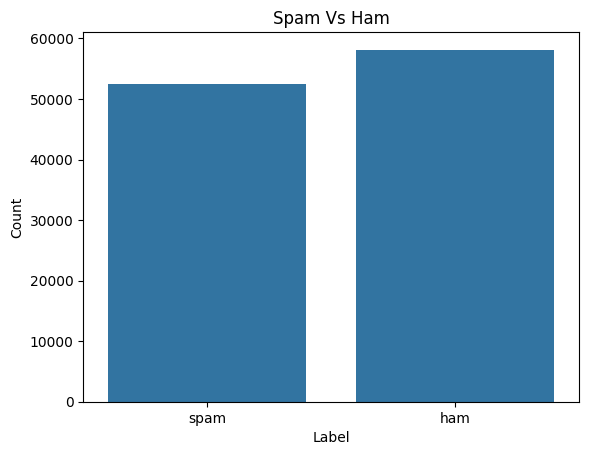

In [18]:
sns.countplot(x = 'label', data = df)
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Spam Vs Ham')

In [19]:
df

,label,text
0,spam,viiiiiiagraaaa\nonly for the ones that want to...
1,ham,got ice thought look az original message ice o...
2,spam,yo ur wom an ne eds an escapenumber in ch ma n...
3,spam,start increasing your odds of success & live s...
4,ham,author jra date escapenumber escapenumber esca...
...,...,...
110697,spam,hard erection long lasting effects no prescrip...
110698,ham,subject knowledge language bibliography associ...
110699,spam,dawnyes dawn dawn nightsummer kisses winter te...
110700,ham,hello smescapenumberlies topcoder and yodlee h...


1. Remove all punctuation

In [20]:
import string

# Create a function 

def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))

df['text'] = df['text'].apply(remove_punctuation)


2. Import string & exclude=string.punctuation

In [21]:
exclude = string.punctuation
print(exclude)  # !"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


4. Stopword removal

In [25]:
# from nltk.corpus import stopwords
# stopword = stopwords.words("english")

In [23]:
from nltk.corpus import stopwords
import nltk # Import nltk to use the download function

# Download the 'stopwords' corpus if it's not already present
try:
    stopword = stopwords.words("english")
except LookupError:
    nltk.download('stopwords')
    stopword = stopwords.words("english")
    

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [24]:
df['text'] = df['text'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in stopword]))


5. Tokenization

In [29]:
# from nltk.tokenize import word_tokenize
# from tqdm import tqdm
# tqdm.pandas()

# df['text'] = df['text'].progress_apply(word_tokenize)

In [28]:
import nltk
try:
    nltk.data.find('tokenizers/punkt_tab')
except LookupError:
    nltk.download('punkt_tab')

from nltk.tokenize import word_tokenize
from tqdm import tqdm
tqdm.pandas()

df['text'] = df['text'].progress_apply(word_tokenize)


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
100%|██████████| 110701/110701 [01:48<00:00, 1016.06it/s]


 Next steps after tokenization

In [30]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()
df['text'] = df['text'].apply(lambda x: [ps.stem(word) for word in x])


In [31]:
df['text'] = df['text'].apply(lambda x: ' '.join(x))


In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=3000)
X = tfidf.fit_transform(df['text']).toarray()


In [33]:
y = df['label'].map({'spam': 1, 'ham': 0})


Train-Test Split:

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [35]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train, y_train)


MultinomialNB()

In [36]:
from sklearn.metrics import accuracy_score, classification_report
y_pred = model.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


0.9320717221444379
              precision    recall  f1-score   support

           0       0.93      0.94      0.94     11659
           1       0.93      0.92      0.93     10482

    accuracy                           0.93     22141
   macro avg       0.93      0.93      0.93     22141
weighted avg       0.93      0.93      0.93     22141

